# Titanic: 타이타닉호의 생존률 예측을 위한 전처리

---

- 침몰된 타이타닉호로부터 살아나온 생존자에 대해서 분석
- 어떤 변수가 생존율에 영향을 더 미쳤는지 파악해 보자

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # 데이터 시각화를 Python 라이브러리
import seaborn as sns  # 데이터 시각화를 Python 라이브러리

from IPython.display import Image # 주피터 노트북에 이미지 삽입을 위한 라이브러리

%matplotlib inline 

# 화면에 보이는 테이블 정보량 설정
pd.set_option('max_rows', 30)
pd.set_option('max_columns', 15) 

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True


# 1. 훈련 데이터 살펴보기

## 데이터불러오기
- 타이나틱 데이터를 불러오고 열과 행의 수를 세어보세요

In [4]:
# 작성해보세요~




(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- 타이타닉데이터에서 끝에 승객 5명만 보이게 불러오세요

In [6]:

# 작성해보세요~



PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## 변수 간 상관관계는 어느 정도일까?

### 상관계수(Correlation Coefficient)

- 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법이다.
- 두 변수는 서로 독립적인 관계로부터 서로 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다.

> **Q. 모든 컬럼을 대상으로 상관계수(corr())을 알아보려면 어떻게 해야할까요?**

In [69]:
# 작성해보세요~


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

### 테이블 보단 역시 그림, heatmap!
- headmap을 활용해서 변수간 상관관계를 그래프로 나타내세요

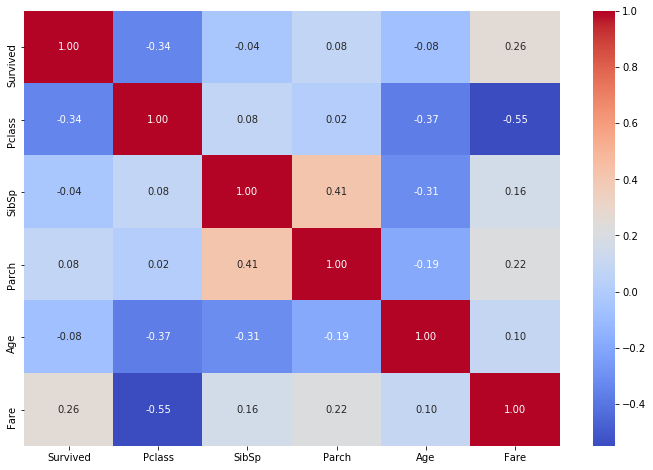

In [8]:
# 작성해보세요~





### Embarked 컬럼의 결측치를 채워보세요
- 어떤것으로 채우는게 좋을까요?

In [71]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

- 먼저 각 승선위치의 분포를 percentage로 계산해보세요

In [72]:
# 작성해보세요~



S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

- 제일 percent가 높은 'S'로 채워보세요

In [73]:
# 작성해보세요~



- 이제 더이상 Embarked에 누락값이 없는지 확인해보세요

In [74]:
# 작성해보세요~



False

### Age 컬럼의 결측치를 채워보고자 합니다
- 먼저 결측치의 비율을 확인해보세요

In [75]:
# 결측치 비율 확인



19.865319865319865

- 'Age'의 빈도를 히스트그램으로 시각화해보세요

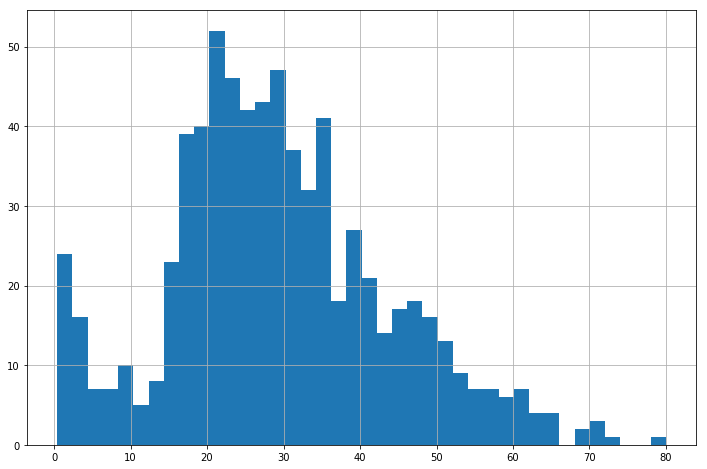

In [76]:
# 작성해보세요~



> 여러가지 컬럼값을 하나의 그래프로 나타내는 방법들도 존재한다!

> 다양한 시각화 방법이 존재합니다 다른 그래프로도 다양한 변수들에 대해서 시각화를 시도해보세요

In [ ]:
# 작성해보세요~



---

## 본격적으로 Age의 결측치를 채워보자.

> Age 평균을 구하세요

29.69911764705882

> 중앙값?

28.0

> 최빈값?

0    24.0
dtype: float64

> **성별에 따른 나이차는 없을지 확인해보세요?**

In [85]:
# 남자의 나이 평균은?


30.72664459161148

In [86]:
# 여자의 나이 평균은?



27.915708812260537

> **Q. 승객의 성별('Sex') 나이의 중앙값을 찾아보자.**

In [ ]:
# 작성해보세요~



















29.0

27.0

> **Q. 승객의 선실 등급('Pclass')별 나이의 평균을 찾아보자.**

In [90]:
# 1등석의 나이 평균은?



37.0

In [91]:
# 2등석의 나이 평균은?




29.0

In [92]:
# 3등석의 나이 평균은?




24.0

> **Q. 승객의 선실 등급('Pclass')과 성별('Sex)을 둘다 고려하여 분류하고 각각의 나이의 중앙값을 찾아보자. (1등석에 탑승한 여자의 나이의 Median은? 2등석에 탑승한 남자의 나이의 Median은?)**

In [93]:
# 1등석에 탑승한 남자의 나이의 median은?


40.0

In [94]:
# 2등석 남자



30.0

In [9]:
# 3등석 남자




In [96]:
# 1등석 여자



35.0

In [97]:
# 2등석 여자




28.0

In [98]:
#3등석 여자




21.5

> 위 자료를 이용하여 Age의 결측치를 채워보자.

In [99]:
median_male_1 = train_df[
    (train_df['Sex'] == 'male') & (train_df['Pclass'] == 1)
]['Age'].median()

> **Q. 같은 방식으로 나머지 결측치도 채워보자.**

In [104]:
# 작성해보세요~







- 이제 나이 컬럼에 결측치가 없는지 확인해보세요

0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

---

### Cabin의 결측치는 어떻게 채우는것이 좋을까요?

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

207        NaN
65         NaN
281        NaN
334        NaN
150        NaN
176        NaN
224        C93
751       E121
357        NaN
101        NaN
390    B96 B98
664        NaN
672        NaN
730         B5
78         NaN
217        NaN
862        D17
576        NaN
578        NaN
861        NaN
53         NaN
539        B39
538        NaN
600        NaN
800        NaN
648        NaN
247        NaN
358        NaN
660        NaN
815       B102
Name: Cabin, dtype: object

> **Cabin 컬럼을 채우는 것이 의미가 있을까? 채워지는 데이터는 신뢰할 수 있는걸까요?**

> **Q. Cabin 컬럼을 데이터 프레임에서 제거해봅시다.**

## 생존예측에 도움이 되지 않는 변수는 제거합시다

- 변수들이 도움이 되는지 안되는지 먼저 상관관계 히트맵을 그려보세요
- 상관계수가 낮은 변수는 뭔지 상관관계 히트맵을 그려보세요

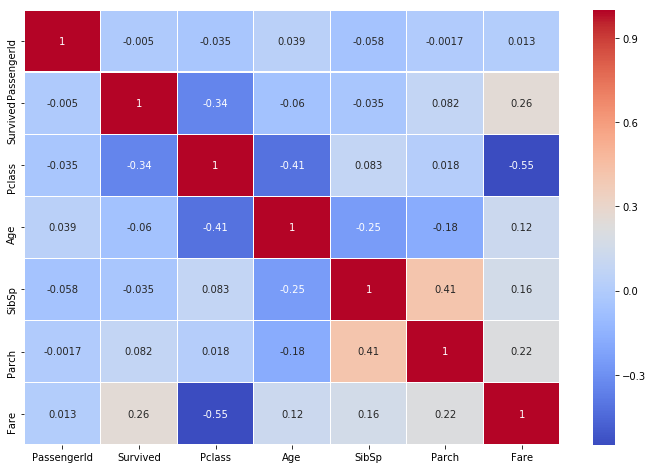

- 상관계수가 낮은 컬럼을 삭제하세요

In [112]:
# 작성해보세요~



## 기존 데이터 셋의 정보를 이용하여 새로운 컬럼을 추가해보자(Feature Engineering!)
- 예를 들어 SibSp과 Parch 정보를 활용해서 혼자 온 승객인지 아닌지, 가족의 사이즈는 얼마인지 알려주는 컬럼을 추가해봅시다

In [113]:
# 작성해보세요~




> Q. 새로 추가한 'Fsize' 컬럼이 대체하는 'SibSp'와 'Parch' 두 컬럼을 데이터 프레임에서 제거해 보자.

- 특성공학이 끝났으면 기존의 'SibSp, Parch'컬럼은 삭제하고, 다시 상관계수 히트맵을 그려서 Fsize의 상관계수를 알아보세요

In [114]:
# 작성해보세요~




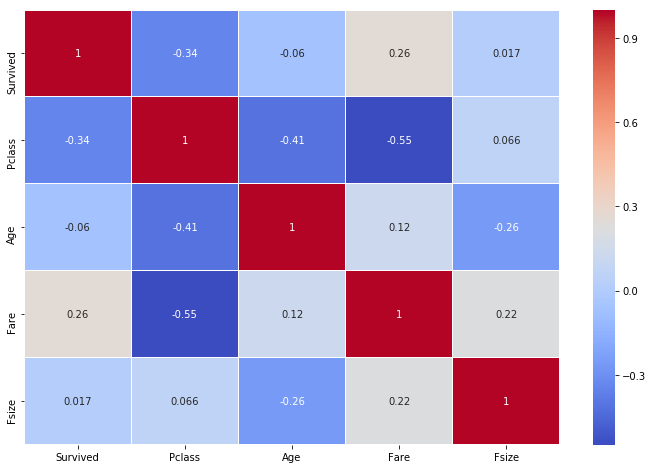

## Encoding : 기계학습을 위해 문자열을 숫자로 치환하여야 합니다
- 즉 Sex와 male와 female은 문자열이라서 숫자형으로 변환해줘야 합니다. 성별을 0과 1로 인코딩해보세요

In [117]:
# 작성해보세요~




# 수고하셨습니다!!